In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("churn.csv")

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blank into zero in totalcharges as tenure equal to zero

In [6]:
data['TotalCharges'] = data['TotalCharges'].replace(" " , "0")
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data.duplicated().sum()

0

In [9]:
data['customerID'].duplicated().sum()

0

#converted 0 and to 1 values of senior citizen to yes/no to make it easier to understand 

In [10]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"
data['SeniorCitizen'] = data['SeniorCitizen'].apply(conv)

In [11]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


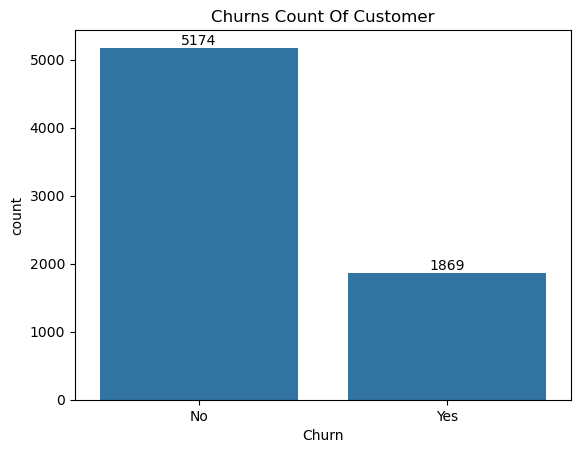

In [12]:
ax = sns.countplot(x = 'Churn' , data = data)
plt.title("Churns Count Of Customer")
ax.bar_label(ax.containers[0])
plt.show()

In [13]:
gb = data.groupby(data["Churn"]).agg({"Churn" : "count"})

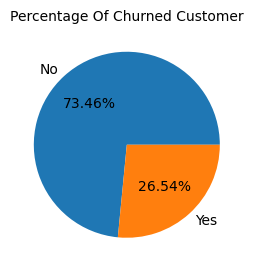

In [14]:
plt.figure(figsize = (3,4))
plt.pie(gb['Churn'] , labels = gb.index , autopct = "%1.2f%%")
plt.title("Percentage Of Churned Customer" , fontsize = 10)
plt.show()

# From the given pie chart we can conclude that 26.54% of our customer have been churned out , now explore the reason behind it

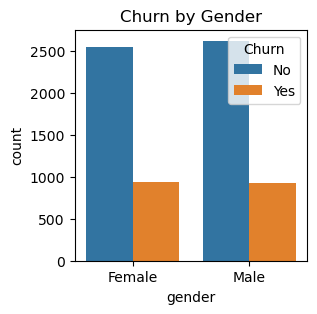

In [15]:
plt.figure(figsize = (3 , 3))
sns.countplot(x = 'gender' , hue = 'Churn' , data = data)
plt.title('Churn by Gender')
plt.show()

In [16]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Text(0.5, 1.0, 'Count of Cutomer who are senior citizen')

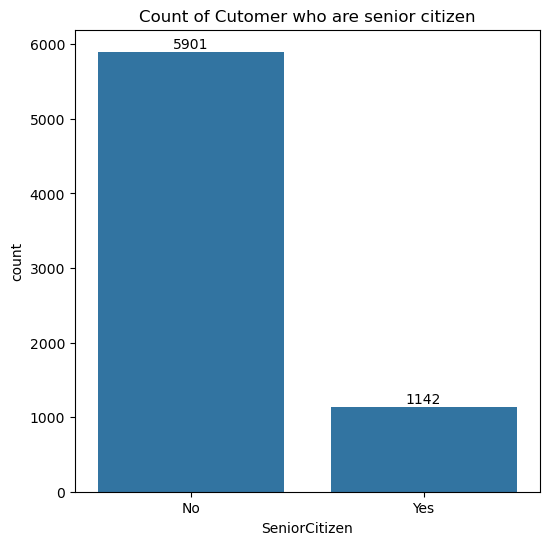

In [17]:
plt.figure(figsize = (6 , 6))
ax = sns.countplot(x = 'SeniorCitizen' , data = data)
ax.bar_label(ax.containers[0])
plt.title("Count of Cutomer who are senior citizen")

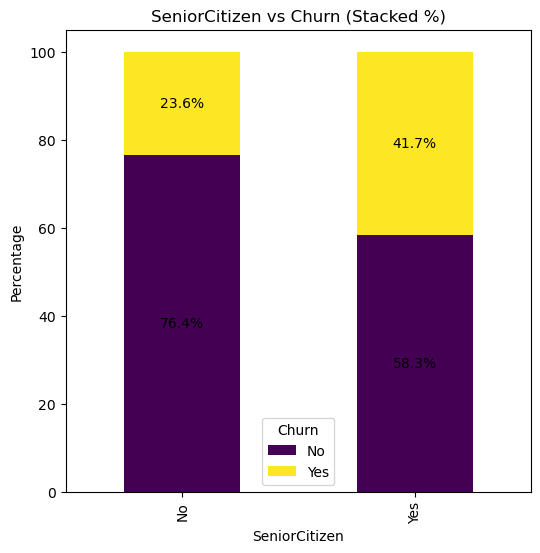

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Create crosstab of counts
stacked_data = pd.crosstab(data['SeniorCitizen'], data['Churn'])

# Convert counts to percentage row-wise
stacked_perc = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100

# Plot stacked percentage bar chart
ax = stacked_perc.plot(
    kind='bar', stacked=True, figsize=(6,6), colormap="viridis"
)

# Add percentage labels inside bars
for c in ax.containers:
    ax.bar_label(c, fmt="%.1f%%", label_type="center", fontsize=10, color="Black")

plt.xlabel("SeniorCitizen")
plt.ylabel("Percentage")
plt.title("SeniorCitizen vs Churn (Stacked %)")
plt.legend(title="Churn")
plt.show()


# Comparatively greated percentage of people in senior citizen catagory have churned

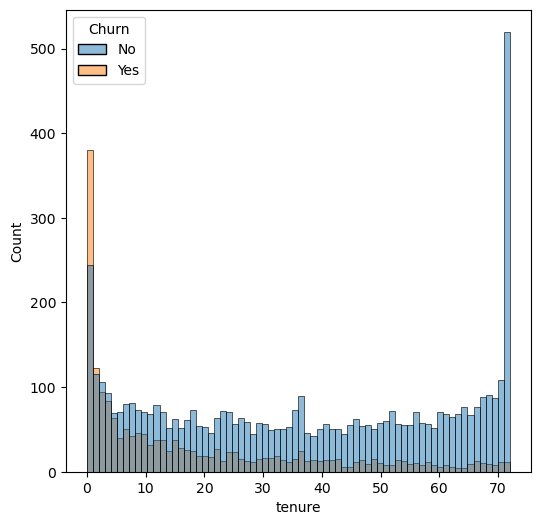

In [19]:
plt.figure(figsize = (6 , 6))
sns.histplot(x = "tenure" , data = data , bins = 70 , hue = 'Churn')
plt.show()

#People who have used our serivces for a long time have stayed and people who have used our sevices #1 or 2 months have churned

Text(0.5, 1.0, 'Count of Cutomers by Contract')

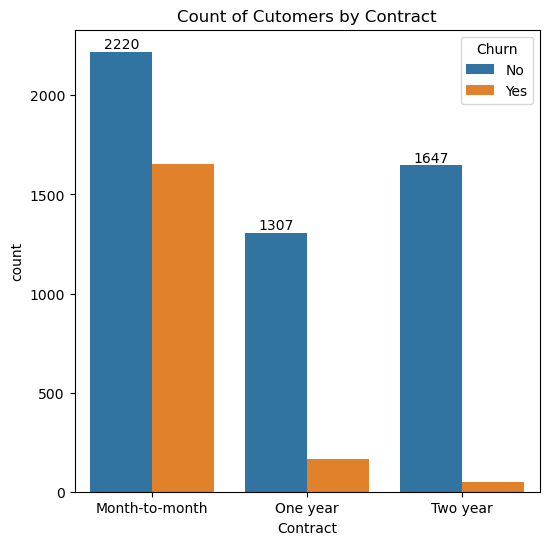

In [22]:
plt.figure(figsize = (6 , 6))
ax = sns.countplot(x = 'Contract' , data = data , hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of Cutomers by Contract")

# People who have month to month contract are likely to churn than from those who have 1 or 2 years of contract

In [25]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

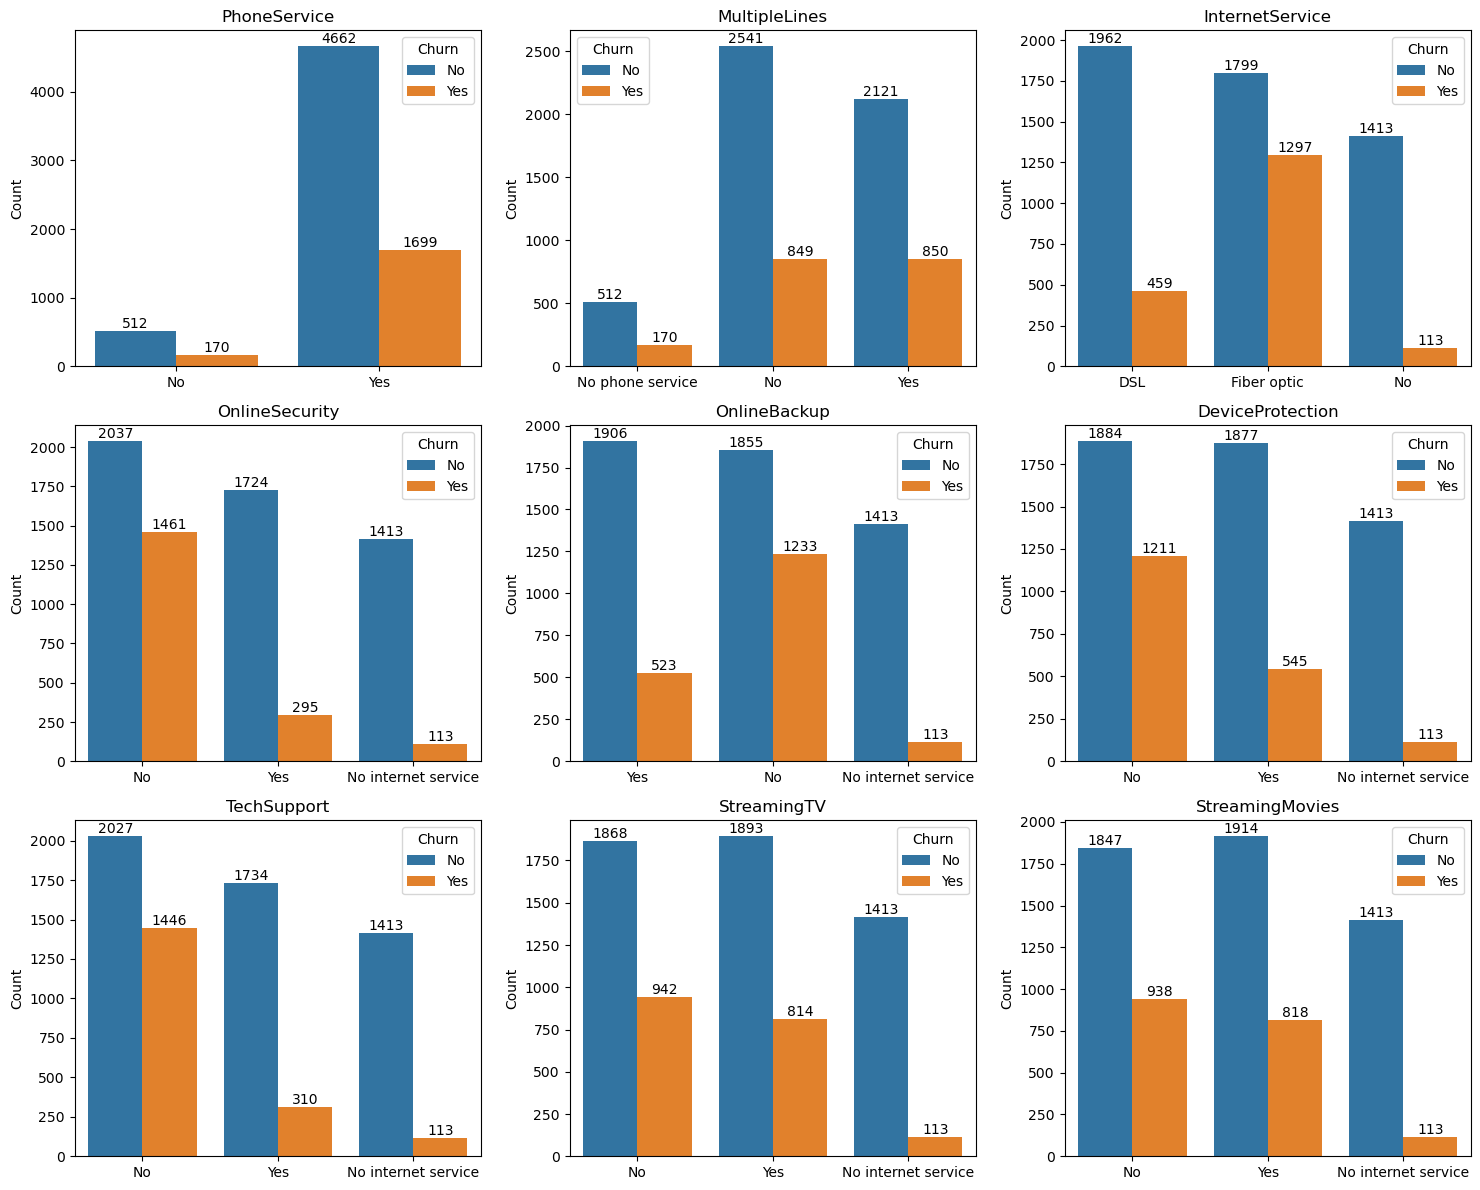

In [39]:
# List of categorical columns
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns per row in subplot grid
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols   # ceil division

# Create figure
plt.figure(figsize=(15, 12))

# Loop through features
for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    ax = sns.countplot(x=col, data=data, hue=data['Churn'], legend=True)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(col, fontsize=12)
    plt.xlabel("")   # optional: hide x-axis label
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

**From your subplots, we can see that most customers in this dataset have PhoneService = Yes and use InternetService = DSL or Fiber optic. However, a large proportion of them do not subscribe to add-ons like OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies. Interestingly, churn is noticeably higher among customers who lack these additional services, especially with Fiber optic internet. Overall, the absence of bundled services appears to be correlated with higher churn.**

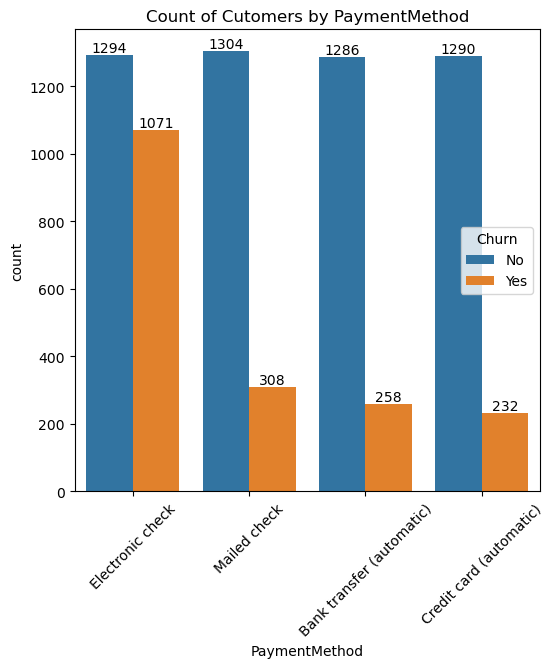

In [43]:
plt.figure(figsize = (6 , 6))
ax = sns.countplot(x = 'PaymentMethod' , data = data , hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 45)
plt.title("Count of Cutomers by PaymentMethod")
plt.show()